# My Final Project Presentation

This is a series of cells that 1) sets up my code and data analysis that I will be sharing with the class in COMM 313, and 2) uses Jupyter Hub's presentation slide format! 

It includes my project title, rationale for why I chose my topic, research question and hypothesis, data collection and descriptives, initial data analysis (sentiment analysis) and results, and next steps.

Thank you and enjoy!

In [1]:
import requests
from bs4 import BeautifulSoup
import math
import time
import json
from nltk.corpus import stopwords
import random
import re
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter

In [2]:
def tokenize(text, lowercase=False, strip_chars=''):
    '''create a list of tokens from a string by splitting on whitespace and applying optional normalization 
    
    Args:
        text        -- a string object containing the text to be tokenized
        lowercase   -- should text string be normalized as lowercase (default: False)
        strip_chars -- a string indicating characters to strip out of text, e.g. punctuation (default: empty string) 
        
    Return:
        A list of tokens
    '''
    
    # create a replacement dictionary from the
    # string of characters in the **strip_chars**
    rdict = str.maketrans('','',strip_chars)
    
    if lowercase:
        text = text.lower()
    
    tokens = text.translate(rdict).split()
    
    return tokens

In [3]:
characters_to_strip = '().[]!,"'

In [4]:
metacritic_host_user = json.load(open('../data/user_reviews/metacritic_host_user.json'))

In [5]:
metacritic_parasite_user = json.load(open('../data/user_reviews/metacritic_parasite_user.json'))

In [6]:
sid = SentimentIntensityAnalyzer()

In [7]:
words_to_remove = [
    'monster',
    'virus',
    'expand',
    'host',
    'movie',
     'kill',
    'expand',
    'parasite',
    'movie',
    'sucks',
    'poor',
    'struggles',
    'hard'
]

# Final Project Presentation

## _Parasite_ and _The Host_ - How has Director Bong Joon Ho's work grown on us? 

#### Mary Shin | COMM 313 Spring 2021

## Research Question:

### How have public audiences and film critics reacted to Director Bong Joon Ho's _Parasite_ and _The Host_ ?



## Hypothesis:

### _Parasite_ (2019) has been more well-received (higher ratings, more positive sentiment reviews) than _The Host_ (2006)

## Background:

* Movie reviews from public audience vs. film critics
* 2x2 research design: _The Host_ vs. _Parasite_ and User review vs. Critic review

Text(0.5, 1.0, '2x2: Film vs. User/Critic Review')

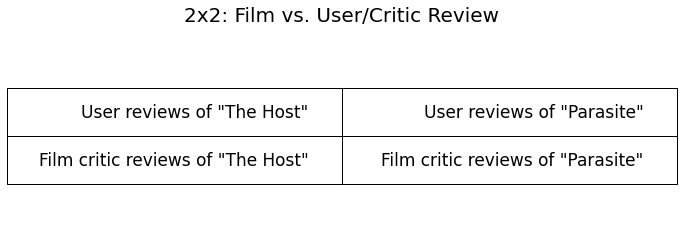

In [23]:
fig, ax = plt.subplots()

two_by_two = [
    ['User reviews of "The Host"', 'User reviews of "Parasite"'],
    ['Film critic reviews of "The Host"', 'Film critic reviews of "Parasite"']
]

table = ax.table(cellText = two_by_two, loc='center')
table.set_fontsize(20)
table.scale(2,4)
ax.axis('off')
plt.title('2x2: Film vs. User/Critic Review', size=20)

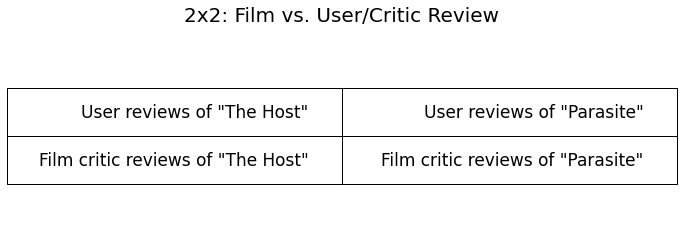

In [26]:
fig

## Data

* Web-scraping - Metacritic and Rotten Tomatoes: user reviews, critic reviews 
   -  However, need more data on critic reviews!
* To fill in the gap for critic reviews - Nexis Uni: newspaper and blog articles that are movie reviews

What I have so far:
* _The Host_ - 100 user reviews, 217 critic reviews and _Parasite_ - 324 user reviews, 314 critic reviews


To fill the gap between the user reviews:
* Scrape more user reviews on Rotten Tomatoes

## Analysis

* Small sample of user reviews for both movies, amount of positively rated vs. negatively rated
* Mean compound sentiment scores

In [9]:
# Looking at one random user review of The Host in my dict:
metacritic_host_user[10]

{'date': 'Nov  5, 2015',
 'score': '8',
 'text': 'Fresh, exciting and not your typical cliched Hollywood rubbish. Loved it. Great effects, real tension and all the elements you want in a horror/action film. Those who dont get it should go back to crap like Godzilla.'}

In [10]:
# Random user review of Parasite:
metacritic_parasite_user[10]

{'date': 'Jan 22, 2021',
 'score': '7',
 'text': "It's an interesting movie, hard to compare to anything else. It has its own unique style. Thrilling and funny at the same time. Has some society critical messages included. Anyway the characters and plot don't feel comprehensible. It's anIt's an interesting movie, hard to compare to anything else. It has its own unique style. Thrilling and funny at the same time. Has some society critical messages included. Anyway the characters and plot don't feel comprehensible. It's an interestic movie but no 'must see' for me. Overall I can't understand this huge hype at all, even so I am a big fan of movies with an unexpectable plot.… Expand"}

## How many positively rated vs. negatively rated reviews?

In [11]:
# Positive vs. negative scores (on a scale of 0-10)

pos_host = []
neg_host = []

for review in metacritic_host_user:
    if int(review['score'])>5:
        pos_host.append(review)
    else:
        neg_host.append(review)

In [12]:
# Same thing for parasite user reviews:

pos_parasite = []
neg_parasite = []

for review in metacritic_parasite_user:
    if int(review['score'])>5:
        pos_parasite.append(review)
    else:
        neg_parasite.append(review)

In [13]:
print(f'{len(pos_host)} positive user reviews of The Host')
print(f'{len(neg_host)} negative user reviews of The Host')
print('and')
print(f'{len(pos_parasite)} positive user reviews of Parasite')
print(f'{len(neg_parasite)} negative user reviews of Parasite')

52 positive user reviews of The Host
48 negative user reviews of The Host
and
88 positive user reviews of Parasite
12 negative user reviews of Parasite


### Sentiment Analysis using VADER

1) Tokenize each review

2) Filter tokens to exclude words that would mess up the sentiment scores
  * Words to describe the plot, movie descriptives, rather than about reviewer's opinion/thought/feeling

3) For each review, run `sid.polarity_scores` function and add those scores to each review

In [14]:
for review in metacritic_host_user:
    tokens = tokenize(review['text'], lowercase=True, strip_chars=characters_to_strip)
    filtered_tokens = [t for t in tokens if t not in words_to_remove]
    review['tokens']=filtered_tokens

In [15]:
for review in metacritic_host_user:
    text = ' '.join(review['tokens'])
    scores = sid.polarity_scores(text)
    review.update(scores)

In [16]:
# Same thing for user reviews of parasite:
for review in metacritic_parasite_user:
    tokens = tokenize(review['text'], lowercase=True, strip_chars=characters_to_strip)
    filtered_tokens = [t for t in tokens if t not in words_to_remove]
    review['tokens']=filtered_tokens

In [17]:
for review in metacritic_parasite_user:
    text = ' '.join(review['tokens'])
    scores = sid.polarity_scores(text)
    review.update(scores)

## Results

* Finding mean compound scores from sentiment analysis 
* Comparing those review sentiment scores between the two movies

In [21]:
# Mean sentiment score for user reviews of the host:

sum([review['compound'] for review in metacritic_host_user])/len(metacritic_host_user)


0.15178400000000009

In [22]:
# Mean sentiment score for user reviews of parasite:

sum([review['compound'] for review in metacritic_parasite_user])/ len(metacritic_parasite_user)

0.5880540000000001

Based on this initial analysis, there are 1) **more positively rated reviews** of _Parasite_ than _The Host_ and 2) **higher mean compound sentiment scores** among reviews of _Parasite_ than _The Host_ 

## Next Steps

* Collect more data on _The Host_ user reviews, fill in the gaps in data
* Clean and organize data from metacritic, nexis uni
* Try sentiment analysis using NRC Lexicon
* Run sentiment analysis and look into what's driving either positive or negative sentiment
    - Perhaps specific words that tend to occur for positive sentiment reviews (e.g. "masterpiece")

## Thank you! :)


-Mary Shin